In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import time
import glob

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

In [3]:
os.getcwd()

'/Users/fuma/adtech-compe-2018-e/ml/notebook'

In [4]:
file_path = glob.glob("../../data/*")
csv_path = glob.glob("../../data/*.csv")

In [5]:
file_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/cpc_budget.json',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

In [6]:
csv_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

# read data 

In [11]:
banner_size_master = pd.read_csv(csv_path[0])
demogra = pd.read_csv(csv_path[1])
df_train = pd.read_csv(csv_path[2])
banner_position_master = pd.read_csv(csv_path[3])
device_type_master = pd.read_csv(csv_path[4])

In [16]:
banner_size_master

,id,bannerSize
0,1,320×50
1,2,320×100
2,3,300×250
3,4,320×480


In [17]:
demogra.head()

,deviceId,age,gender,hasChild,income,isMarried
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,female,yes,458.0,yes
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,female,no,678.0,no
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,female,no,NaN,NaN
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,UNKNOWN,NaN,536.0,yes
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,female,NaN,NaN,NaN


In [18]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [19]:
banner_position_master

,id,bannerPosition
0,1,Above the Fold
1,2,Below the Fold
2,3,Header
3,4,Footer
4,5,Sidebar
5,6,Full Screen


In [20]:
device_type_master

,id,deviceType
0,1,Mobile
1,2,PC
2,3,Tablet


# check dtypes etc. 

In [21]:
print("------- demogra --------")
print("")  
print("data type:\n",demogra.dtypes)
print("")
print("number of null:\n",demogra.isnull().sum())
print("")
print("data length:\n",len(demogra))
print("")
print("u_unique:\n",demogra.nunique())

------- demogra --------

data type:
 deviceId      object
age          float64
gender        object
hasChild      object
income       float64
isMarried     object
dtype: object

number of null:
 deviceId          0
age           59935
gender            0
hasChild     225409
income       174807
isMarried    124871
dtype: int64

data length:
 500000

u_unique:
 deviceId     500000
age              65
gender            3
hasChild          2
income          419
isMarried         2
dtype: int64


In [22]:
print("------- df_train --------")
print("")  
print("data type:\n",df_train.dtypes)
print("")
print("number of null:\n",df_train.isnull().sum())
print("")
print("data length:\n",len(df_train))
print("")
print("u_unique:\n",df_train.nunique())

------- df_train --------

data type:
 deviceId           object
bannerPosition      int64
bannerSize          int64
deviceType          int64
floorPrice        float64
id                 object
mediaId             int64
osType             object
timestamp           int64
advId               int64
isClick             int64
dtype: object

number of null:
 deviceId          0
bannerPosition    0
bannerSize        0
deviceType        0
floorPrice        0
id                0
mediaId           0
osType            0
timestamp         0
advId             0
isClick           0
dtype: int64

data length:
 10000000

u_unique:
 deviceId            500000
bannerPosition           6
bannerSize               4
deviceType               1
floorPrice          386585
id                10000000
mediaId               1000
osType                   2
timestamp           604800
advId                   20
isClick                  2
dtype: int64


# target 

(array([7546596.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2453404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

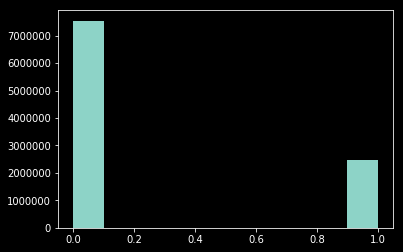

In [23]:
plt.style.use('dark_background')
plt.hist(df_train["isClick"])

In [24]:
print("非クリック・クリック比:",len(df_train[df_train["isClick"]==1])/len(df_train[df_train["isClick"]==0]))

非クリック・クリック比: 0.3251007474098256


アンダーサンプリング・オーバーサンプリング等はいらなそう！ 

# test model 

サーバーサイドとの検証用にとりあえずめっちゃ雑なモデルを作っておく 

In [10]:
df_train.columns

Index(['deviceId', 'bannerPosition', 'bannerSize', 'deviceType', 'floorPrice',
       'id', 'mediaId', 'osType', 'timestamp', 'advId', 'isClick'],
      dtype='object')

In [8]:
# objectをlabel-encode
from sklearn.preprocessing import LabelEncoder

list_target = list(df_train.drop(["bannerPosition","bannerSize","deviceType",
                                  "floorPrice","mediaId","timestamp","advId",
                                  "isClick"],axis=1).columns)
for target in list_target:
    le = LabelEncoder()
    le.fit(df_train[target])
    df_train[target] = le.transform(df_train[target])

In [9]:
print(df_train.drop(["id","isClick"],axis=1).columns)

Index(['deviceId', 'bannerPosition', 'bannerSize', 'deviceType', 'floorPrice',
       'mediaId', 'osType', 'timestamp', 'advId'],
      dtype='object')


In [26]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,399309,6,4,1,19392.00,5419432,608,1,1535203765,11,0
1,171090,5,1,1,6758.20,9450176,176,1,1535135105,6,1
2,47301,5,1,1,8816.15,7964823,281,1,1534845969,1,0
3,205113,5,3,1,9572.60,9041901,22,0,1534931092,2,1
4,272139,1,1,1,9793.30,5712829,869,1,1535129929,15,0


In [103]:
X_train = df_train.drop(["id","isClick"],axis=1).values
y_train = df_train["isClick"].values

In [28]:
# ランダムフォレスト
t1 = time.time()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=10)
rfc.fit(X_train, y_train)

t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

経過時間：1217.3535888195038


In [29]:
# 訓練精度
print('train acc: %.3f' % rfc.score(X_train, y_train))

train acc: 0.973


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, rfc.predict(X_train))

In [31]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.RdYlGn, alpha=10)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() 
    plt.show()

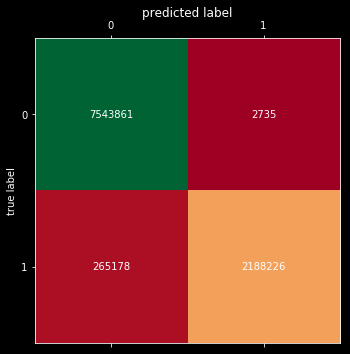

In [32]:
plot_cm(cm)

In [69]:
import pickle

In [79]:
import sys
max_bytes = 2**31 - 1
bytes_out = pickle.dumps(rfc)
n_bytes = sys.getsizeof(bytes_out)
with open('test_model.pickle', 'wb') as f_out:
    for idx in range(0, n_bytes, max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])

In [81]:
sys.getsizeof(rfc)

56

In [82]:
bytes_in = bytearray(0)
input_size = os.path.getsize("test_model.pickle")
with open("test_model.pickle", 'rb') as f_in:
    for _ in range(0, input_size, max_bytes):
        bytes_in += f_in.read(max_bytes)
data2 = pickle.loads(bytes_in)

In [84]:
print('train acc: %.3f' % data2.score(X_train, y_train))

train acc: 0.973


In [93]:
data2.predict(X_train[0].reshape(1,-1))

array([0])

In [92]:
X_train[0]

array([3.99309000e+05, 6.00000000e+00, 4.00000000e+00, 1.00000000e+00,
       1.93920000e+04, 6.08000000e+02, 1.00000000e+00, 1.53520376e+09,
       1.10000000e+01])

In [94]:
with open("a.pickle","wb") as file:
    pickle.dump(rfc, file)

OSError: [Errno 22] Invalid argument

In [111]:
sys.getsizeof(demogra)

135591622

In [104]:
# ランダムフォレスト
t1 = time.time()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=10,max_depth=3)
rfc.fit(X_train, y_train)

t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

経過時間：131.72994875907898


In [105]:
with open("depth10.pickle","wb") as file:
    pickle.dump(rfc, file)

In [110]:
%%time
rfc.predict(X_train[0].reshape(1,-1))

CPU times: user 1.26 ms, sys: 271 µs, total: 1.53 ms
Wall time: 1.99 ms


array([0])